In [ ]:
import pandas as pd
import numpy as np

# Chargement des données depuis l'Excel
df = pd.read_excel('/ESG_scores.xlsx')

# Définition des variables et des poids
variables = ['Risk_of_dilution', 'Composition_governance_bodies', 'Functioning_governance_bodies',
             'Compensation_officers_directors', 'Business_ethics', 'CSR_policy']
weights = np.array([0.04, 0.20, 0.20, 0.16, 0.20, 0.20])

# Extraction des données pertinentes
data = df[variables].values

# Normalisation distributive
data_normalized = np.zeros_like(data, dtype=float)

for j in range(data.shape[1]):  # Pour chaque colonne (critère)
    norm_factor = np.sqrt(np.sum(data[:, j] ** 2))  # Calcul de la racine de la somme des carrés des éléments
    data_normalized[:, j] = data[:, j] / norm_factor  # Normalisation de chaque élément de la colonne
  # Vérification des données normalisées
print("Données après normalisation distributive :")
print(data)

# Calcul des solutions idéales (positive et négative)
ideal_positive = np.max(data_normalized, axis=0)
ideal_negative = np.min(data_normalized, axis=0)

# Calcul des distances par rapport aux solutions idéales
dist_positive = np.sqrt(np.sum(((data_normalized - ideal_positive) ** 2) * weights, axis=1))
dist_negative = np.sqrt(np.sum(((data_normalized - ideal_negative) ** 2) * weights, axis=1))

# Calcul du score de performance (proximité à la solution idéale positive)
scores1 = dist_negative / (dist_positive + dist_negative)

# Ajouter les scores, distances et classement à la dataframe originale
df['Distance_Positive'] = dist_positive
df['Distance_Negative'] = dist_negative
df['Score1'] = scores1
df['Rank'] = df['Score1'].rank(ascending=False).astype(int)

# Trier les alternatives par leur classement
df_sorted = df.sort_values(by='Rank')

# Afficher les solutions idéales
print("Solution idéale positive :")
for i, var in enumerate(variables):
    print(f"{var}: {ideal_positive[i]:.6f}")

print("\nSolution idéale négative :")
for i, var in enumerate(variables):
    print(f"{var}: {ideal_negative[i]:.6f}")

# Afficher les distances idéales, scores et rangs
print("\nDistances idéales, scores finaux et classement :")
print(df_sorted[['Distance_Positive', 'Distance_Negative', 'Score1', 'Rank']])


Données après normalisation distributive :
[[ 3.48234593 63.44009586 62.39529518 66.9313783  31.87664264 51.31281542]
 [ 1.43069667 84.94317941 11.56183951 58.59365526 69.19702955 66.66245502]
 [ 1.13425727 72.44553249 31.72854818 62.49035021 55.43832497 10.59084851]
 [ 2.75657385 61.10235107 41.4826212  67.4689051  38.89505741 13.08949507]
 [ 3.59734485 72.24433826 86.63091579 84.23424376 92.51324896 32.19806065]
 [ 2.1155323  32.29589139 25.04553654  8.31949883 84.16699969 66.15643367]
 [ 4.90382099 36.17886556 48.30342643 76.36828414 35.73975667 84.65062253]
 [ 3.42414869 22.82632309 98.55597856 24.36663745  4.35914638 55.32573448]
 [ 2.40465951 29.37140464 51.94851193 19.42229606 30.47680734 85.44524875]
 [ 1.96058759 63.09761239 61.28945258 57.24569575 39.81856819 38.48378113]
 [ 1.71589008  9.21049399 12.0628666   9.57125166 70.49588305 31.67878971]
 [ 3.64524854 43.37011727 82.63408005 88.53268263 99.5358482  35.42646756]
 [ 2.19286122 43.08627633 60.30601284 62.72489721 35.5914

In [ ]:
import pandas as pd
import numpy as np

# Chargement des données depuis l'Excel
df = pd.read_excel('/ESG_scores.xlsx')

# Définition des variables et des poids
variables = ['Environmental_policy', 'Energy_GHG', 'Water_management', 'Waste_management', 'Biodiversity']
weights = np.array([0.35, 0.35, 0.125, 0.125, 0.05])

# Extraction des données pertinentes
data = df[variables].values

# Étape 1 : Normalisation distributive des données
norm_data = np.zeros_like(data, dtype=float)

for j in range(data.shape[1]):  # Pour chaque colonne (critère)
    norm_factor = np.sqrt(np.sum(data[:, j]**2))  # Calcul de la racine de la somme des carrés des éléments
    norm_data[:, j] = data[:, j] / norm_factor  # Normalisation de chaque élément de la colonne
 # Vérification des données normalisées
print("Données après normalisation distributive :")
print(data)

# Étape 2 : Application des poids aux données normalisées
weighted_data = norm_data * weights

# Étape 3 : Calcul des solutions idéales (positive et négative)
ideal_positive = np.max(weighted_data, axis=0)
ideal_negative = np.min(weighted_data, axis=0)

# Afficher les solutions idéales
print("Solution idéale positive :")
for i, var in enumerate(variables):
    print(f"{var}: {ideal_positive[i]:.6f}")

print("\nSolution idéale négative :")
for i, var in enumerate(variables):
    print(f"{var}: {ideal_negative[i]:.6f}")

# Étape 4 : Calcul des distances par rapport aux solutions idéales
dist_positive = np.sqrt(np.sum((weighted_data - ideal_positive) ** 2, axis=1))
dist_negative = np.sqrt(np.sum((weighted_data - ideal_negative) ** 2, axis=1))

# Étape 5 : Calcul du score de performance (proximité à la solution idéale positive)
scores2 = dist_negative / (dist_positive + dist_negative)

# Ajouter les scores, distances et classement à la dataframe originale
df['Distance_Positive'] = dist_positive
df['Distance_Negative'] = dist_negative
df['Score2'] = scores2
df['Rank'] = df['Score2'].rank(ascending=False).astype(int)

# Trier les alternatives par leur classement
df_sorted = df.sort_values(by='Rank')

# Afficher les distances idéales, scores et rangs
print("\nDistances idéales, scores finaux et classement :")
print(df_sorted[['Distance_Positive', 'Distance_Negative', 'Score2', 'Rank']])

# Sauvegarder les résultats dans un fichier Excel
df_sorted.to_excel('Environment_TOPSIS_results.xlsx', index=False)


Données après normalisation distributive :
[[4.17291061e+01 5.54540841e-01 5.02071100e+01 8.87593460e+01
  8.19624044e-02]
 [9.89034507e+01 4.84909443e+01 6.74486351e+00 1.61186304e+00
  3.60592183e+00]
 [2.36599812e+01 9.88328535e+01 9.93033261e+01 1.26958031e+01
  3.86875706e-02]
 [9.16832333e+01 3.75185527e+01 2.36462396e+01 7.77162462e+01
  4.24111387e-01]
 [9.18397468e+01 9.70381586e+00 3.74292182e+01 4.58952322e+00
  1.12749205e+00]
 [9.12963422e+00 4.61908762e+01 2.14011915e+01 7.10998694e+01
  4.37562267e+00]
 [4.63652725e+01 9.63004466e+01 1.05445866e+01 9.71046141e+01
  1.81788159e+00]
 [5.02216335e+01 3.41830614e+01 2.32479786e+01 8.71682933e+01
  2.69979968e+00]
 [3.13668950e+01 7.98922733e+01 3.00610136e+01 7.10161651e+01
  2.84051607e+00]
 [4.73395372e+00 7.98846331e+01 6.34442268e+01 9.58509743e+01
  1.12731680e+00]
 [2.41685637e+01 2.08248297e+01 2.81234781e+01 4.29813338e+01
  2.86073384e+00]
 [9.55296416e+00 4.43367702e+01 3.62276761e+01 8.72878914e+01
  3.30475898e+0

In [ ]:
import pandas as pd
import numpy as np

# Chargement des données depuis l'Excel
df = pd.read_excel('/ESG_scores.xlsx')

# Définition des variables et des poids
variables = ['Characteristics_social_policy', 'Working_conditions',
             'Skills_development', 'Equal_opportunities',
             'Health_and_safety']
weights = np.array([0.15, 0.22, 0.19, 0.19, 0.25])

# Vérification de la correspondance entre variables et colonnes
assert all(var in df.columns for var in variables), "Certaines variables n'existent pas dans le fichier Excel."

# Extraction des données pertinentes
data = df[variables].values

# Normalisation distributive
for j in range(data.shape[1]):  # Pour chaque colonne (critère)
    norm_factor = np.sqrt(np.sum(data[:, j] ** 2))  # Calcul de la racine de la somme des carrés des éléments
    data[:, j] = data[:, j] / norm_factor  # Normalisation de chaque élément de la colonne
# Vérification des données normalisées
print("Données après normalisation distributive :")
print(data)

# Calcul des solutions idéales (positive et négative)
ideal_positive = np.max(data, axis=0)
ideal_negative = np.min(data, axis=0)

# Afficher les solutions idéales
print("\nSolution idéale positive :")
for i, var in enumerate(variables):
    print(f"{var}: {ideal_positive[i]:.6f}")

print("\nSolution idéale négative :")
for i, var in enumerate(variables):
    print(f"{var}: {ideal_negative[i]:.6f}")

# Calcul des distances par rapport aux solutions idéales
dist_positive = np.sqrt(np.sum(((data - ideal_positive) ** 2) * weights, axis=1))
dist_negative = np.sqrt(np.sum(((data - ideal_negative) ** 2) * weights, axis=1))

# Calcul du score de performance (proximité à la solution idéale positive)
scores = dist_negative / (dist_positive + dist_negative)

# Ajouter les scores, distances et classement à la dataframe originale
df['Distance_Positive'] = dist_positive
df['Distance_Negative'] = dist_negative
df['Score'] = scores
df['Rank'] = df['Score'].rank(ascending=False).astype(int)

# Trier les alternatives par leur classement
df_sorted = df.sort_values(by='Rank')

# Afficher les distances idéales, scores et rangs
print("\nDistances idéales, scores finaux et classement :")
print(df_sorted[['Distance_Positive', 'Distance_Negative', 'Score', 'Rank']])

# Sauvegarder les résultats dans un fichier Excel
df_sorted.to_excel('ESG_scores_normalized_distributive.xlsx', index=False)


Données après normalisation distributive :
[[0.32917665 0.03528697 0.16365841 0.23423068 0.21177808]
 [0.07549513 0.11224351 0.2857378  0.05092895 0.0260605 ]
 [0.10634736 0.35072102 0.21124836 0.0839068  0.254993  ]
 [0.1890725  0.21514118 0.03170886 0.3381462  0.38874915]
 [0.32792945 0.17294818 0.21760816 0.19497237 0.30027775]
 [0.35764216 0.28490933 0.30431686 0.33660216 0.22393059]
 [0.09364072 0.28049921 0.12588302 0.00309397 0.04005614]
 [0.20519749 0.01836781 0.34641882 0.22980384 0.27312884]
 [0.29340887 0.26795957 0.28036769 0.38826035 0.25803832]
 [0.14339053 0.31731919 0.21439363 0.24254518 0.01916146]
 [0.26581367 0.06274137 0.28071388 0.08586333 0.30921585]
 [0.05856371 0.29529652 0.02955949 0.29903121 0.20244293]
 [0.21841032 0.10833993 0.32095307 0.15789259 0.16620618]
 [0.31482301 0.11587668 0.3068043  0.27846124 0.30761098]
 [0.35760243 0.25153638 0.33980663 0.01221514 0.16062582]
 [0.02885691 0.04211755 0.04803945 0.26492797 0.18773328]
 [0.15574444 0.25138929 0.030

In [ ]:
print(df.columns)

Index(['Company', 'Risk_of_dilution', 'Composition_governance_bodies',
       'Functioning_governance_bodies', 'Compensation_officers_directors',
       'Business_ethics', 'CSR_policy', 'Characteristics_social_policy',
       'Working_conditions', 'Skills_development', 'Equal_opportunities',
       'Health_and_safety', 'Environmental_policy', 'Energy_GHG',
       'Water_management', 'Waste_management', 'Biodiversity',
       'Relations_with_suppliers', 'Relations_with_customers_civil_society',
       'Cybersecurity', 'Governance', 'Social', 'Environment',
       'External_Stakeholders', 'ESG', 'Distance_Positive',
       'Distance_Negative', 'Score2', 'Rank'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np

# Chargement des données depuis l'Excel
df = pd.read_excel('/ESG_scores.xlsx')

# Définition des variables et des poids
variables = ['Relations_with_suppliers', 'Relations_with_customers_civil_society', 'Cybersecurity']
weights = np.array([0.40, 0.25, 0.35])

# Extraction des données pertinentes
data = df[variables].values

# Étape 1 : Normalisation distributive des données
norm_data = np.zeros_like(data, dtype=float)

for j in range(data.shape[1]):  # Pour chaque colonne (critère)
    norm_factor = np.sqrt(np.sum(data[:, j]**2))  # Calcul de la racine de la somme des carrés des éléments
    norm_data[:, j] = data[:, j] / norm_factor  # Normalisation de chaque élément de la colonne

# Étape 2 : Calcul des solutions idéales (positive et négative) sur les données normalisées
ideal_positive = np.max(norm_data, axis=0)
ideal_negative = np.min(norm_data, axis=0)

# Afficher les solutions idéales
print("Solution idéale positive :")
for i, var in enumerate(variables):
    print(f"{var}: {ideal_positive[i]:.6f}")

print("\nSolution idéale négative :")
for i, var in enumerate(variables):
    print(f"{var}: {ideal_negative[i]:.6f}")

# Étape 3 : Calcul des distances par rapport aux solutions idéales
dist_positive = np.sqrt(np.sum(((norm_data - ideal_positive) ** 2) * weights, axis=1))
dist_negative = np.sqrt(np.sum(((norm_data - ideal_negative) ** 2) * weights, axis=1))

# Étape 4 : Calcul du score de performance (proximité à la solution idéale positive)
scores4 = dist_negative / (dist_positive + dist_negative)

# Ajouter les distances, scores et classement à la dataframe originale
df['Distance_Positive'] = dist_positive
df['Distance_Negative'] = dist_negative
df['Score4'] = scores4

# Calculer le classement basé sur le score (ordre décroissant)
df['Rank'] = df['Score4'].rank(ascending=False).astype(int)

# Trier les alternatives par le score (ordre décroissant) pour le classement
df_sorted = df.sort_values(by='Rank')

# Afficher les résultats finaux
print("\nDistances idéales, scores finaux, et classement :")
print(df_sorted[['Distance_Positive', 'Distance_Negative', 'Score4', 'Rank']])

# Sauvegarder les résultats dans un fichier Excel
df_sorted.to_excel('ESG_scores_with_scores_and_rank.xlsx', index=False)


Solution idéale positive :
Relations_with_suppliers: 0.364313
Relations_with_customers_civil_society: 0.381819
Cybersecurity: 0.353197

Solution idéale négative :
Relations_with_suppliers: 0.001387
Relations_with_customers_civil_society: 0.036690
Cybersecurity: 0.074089

Distances idéales, scores finaux, et classement :
    Distance_Positive  Distance_Negative    Score4  Rank
9            0.056960           0.293642  0.837537     1
11           0.076142           0.296319  0.795572     2
10           0.078876           0.265860  0.771199     3
2            0.132912           0.260129  0.661836     4
13           0.149886           0.239683  0.615252     5
18           0.158678           0.191724  0.547155     6
7            0.183370           0.219634  0.544992     7
1            0.199193           0.201050  0.502320     8
17           0.205216           0.196883  0.489639     9
16           0.211000           0.173501  0.451236    10
5            0.201801           0.162633  0.446263 

In [ ]:
df['Score1'] = scores1
df['Score2'] = scores2
df['Score3'] = scores3
df['Score4'] = scores4
print(df.columns)

Index(['Company', 'Risk_of_dilution', 'Composition_governance_bodies',
       'Functioning_governance_bodies', 'Compensation_officers_directors',
       'Business_ethics', 'CSR_policy', 'Characteristics_social_policy',
       'Working_conditions', 'Skills_development', 'Equal_opportunities',
       'Health_and_safety', 'Environmental_policy', 'Energy_GHG',
       'Water_management', 'Waste_management', 'Biodiversity',
       'Relations_with_suppliers', 'Relations_with_customers_civil_society',
       'Cybersecurity', 'Governance', 'Social', 'Environment',
       'External_Stakeholders', 'ESG', 'Distance_Positive',
       'Distance_Negative', 'Score4', 'Rank', 'Score1', 'Score2', 'Score3'],
      dtype='object')


In [ ]:
#8 The final TOPSIS  :
import numpy as np
import pandas as pd

# Supposons que df est votre DataFrame


# Définir les poids des scores
weights = np.array([0.35, 0.30, 0.25, 0.10])


# Extraire les scores à partir du DataFrame
scores = df[['Score1', 'Score2', 'Score3', 'Score4']].values



# Calcul des solutions idéales (positive et négative)
ideal_positive = np.max(scores, axis=0)
ideal_negative = np.min(scores, axis=0)


# Afficher les solutions idéales
print("Solution idéale positive :")
for i, score in enumerate(ideal_positive):
    print(f"Score {i+1}: {score:.6f}")


print("\nSolution idéale négative :")
for i, score in enumerate(ideal_negative):
    print(f"Score {i+1}: {score:.6f}")


# Calcul des distances par rapport aux solutions idéales
dist_positive = np.sqrt(np.sum((scores - ideal_positive) ** 2 * weights, axis=1))
dist_negative = np.sqrt(np.sum((scores - ideal_negative) ** 2 * weights, axis=1))


# Calcul du score TOPSIS
topsis_scores = dist_negative / (dist_positive + dist_negative)


# Ajouter le score TOPSIS au DataFrame
df['TOPSIS_Score'] = topsis_scores


# Calcul du rang basé sur les scores TOPSIS
df['RankTOPSIS'] = df['TOPSIS_Score'].rank(ascending=False, method='min').astype(int)
# Trier les alternatives par le score (ordre décroissant) pour le classement
df_sorted = df.sort_values(by='RankTOPSIS')

# Afficher les résultats finaux
print("\nDistances idéales, scores finaux, et classement :")
print(df_sorted[['Distance_Positive', 'Distance_Negative', 'TOPSIS_Score', 'Rank']])

# Sauvegarder les résultats dans un fichier Excel
df_sorted.to_excel('/ESG_scores.xlsx', index=False)

# Afficher les résultats (ID de l'entreprise, TOPSIS Score, Rank)
df_results = df[['Company', 'TOPSIS_Score', 'RankTOPSIS']]
print(df_results)
# Sauvegarder les résultats dans un fichier Excel
df_sorted.to_excel('/content/Ranked_ESG_scores (1).xlsx', index=False)



Solution idéale positive :
Score 1: 0.680553
Score 2: 0.779381
Score 3: 0.755685
Score 4: 0.837537

Solution idéale négative :
Score 1: 0.317386
Score 2: 0.233223
Score 3: 0.293333
Score 4: 0.127163

Distances idéales, scores finaux, et classement :
    Distance_Positive  Distance_Negative  TOPSIS_Score  Rank
13           0.149886           0.239683      0.711750     1
17           0.205216           0.196883      0.642080     2
2            0.132912           0.260129      0.579311     3
8            0.239736           0.176757      0.567976     4
9            0.056960           0.293642      0.540551     5
11           0.076142           0.296319      0.531085     6
4            0.294965           0.042973      0.513308     7
3            0.249903           0.118433      0.509402     8
1            0.199193           0.201050      0.485855     9
6            0.202244           0.133719      0.484998    10
5            0.201801           0.162633      0.456717    11
18           0.158

In [ ]:
import pandas as pd
df_esg = pd.read_excel('/Ranked_ESG_scores.xlsx')  # Remplacez par le chemin réel du fichier
print(df_esg.columns)

Index(['Company', 'Risk_of_dilution', 'Composition_governance_bodies',
       'Functioning_governance_bodies', 'Compensation_officers_directors',
       'Business_ethics', 'CSR_policy', 'Characteristics_social_policy',
       'Working_conditions', 'Skills_development', 'Equal_opportunities',
       'Health_and_safety', 'Environmental_policy', 'Energy_GHG',
       'Water_management', 'Waste_management', 'Biodiversity',
       'Relations_with_suppliers', 'Relations_with_customers_civil_society',
       'Cybersecurity', 'Governance', 'Social', 'Environment',
       'External_Stakeholders', 'ESG', 'ESG_Index', 'Rank'],
      dtype='object')


In [ ]:
# Fusionner les DataFrames df et df_esg sur la colonne 'Company'
df_esg = pd.merge(df_esg, df[['Company', 'RankTOPSIS', 'TOPSIS_Score']], on='Company', how='left')

# Vérifier les premières lignes de df_esg pour s'assurer que les colonnes ont été ajoutées
print(df_esg[['Company', 'RankTOPSIS', 'TOPSIS_Score']].head())

# Sauvegarder df_esg mis à jour dans un fichier Excel
df_esg.to_excel('df_esg_with_TOPSIS_results.xlsx', index=False)


      Company  RankTOPSIS  TOPSIS_Score
0  Company_15          14      0.412393
1  Company_19          12      0.443624
2   Company_5           7      0.513308
3  Company_11          15      0.374305
4   Company_1          17      0.365182


In [ ]:
print(df_esg.columns)

Index(['Company', 'Risk_of_dilution', 'Composition_governance_bodies',
       'Functioning_governance_bodies', 'Compensation_officers_directors',
       'Business_ethics', 'CSR_policy', 'Characteristics_social_policy',
       'Working_conditions', 'Skills_development', 'Equal_opportunities',
       'Health_and_safety', 'Environmental_policy', 'Energy_GHG',
       'Water_management', 'Waste_management', 'Biodiversity',
       'Relations_with_suppliers', 'Relations_with_customers_civil_society',
       'Cybersecurity', 'Governance', 'Social', 'Environment',
       'External_Stakeholders', 'ESG', 'ESG_Index', 'Rank', 'RankTOPSIS',
       'TOPSIS_Score'],
      dtype='object')


In [ ]:
# Calcul de la corrélation entre ScoreTOPSIS et ESG index
correlation = df_esg['TOPSIS_Score'].corr(df_esg['ESG_Index'])

# Affichage du résultat
print(f"La corrélation entre le ScoreTOPSIS et l'ESG index est : {correlation:.4f}")


La corrélation entre le ScoreTOPSIS et l'ESG index est : 0.0233


In [ ]:
# Vérifier les noms de colonnes dans df_esg
print(df_esg.columns)

# Calculer la corrélation de Spearman entre RankTOPSIS et Rank
spearman_corr = df_esg['RankTOPSIS'].corr(df_esg['Rank'], method='spearman')

# Afficher la corrélation de Spearman
print(f"La corrélation de Spearman entre les classements RankTOPSIS et Rank est : {spearman_corr:.4f}")


Index(['Company', 'Risk_of_dilution', 'Composition_governance_bodies',
       'Functioning_governance_bodies', 'Compensation_officers_directors',
       'Business_ethics', 'CSR_policy', 'Characteristics_social_policy',
       'Working_conditions', 'Skills_development', 'Equal_opportunities',
       'Health_and_safety', 'Environmental_policy', 'Energy_GHG',
       'Water_management', 'Waste_management', 'Biodiversity',
       'Relations_with_suppliers', 'Relations_with_customers_civil_society',
       'Cybersecurity', 'Governance', 'Social', 'Environment',
       'External_Stakeholders', 'ESG', 'ESG_Index', 'Rank', 'RankTOPSIS',
       'TOPSIS_Score'],
      dtype='object')
La corrélation de Spearman entre les classements RankTOPSIS et Rank est : 0.0120


<ipython-input-53-82fb6d72a209>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company', y='TOPSIS_Score', data=df_esg_sorted_topsis, palette='viridis')


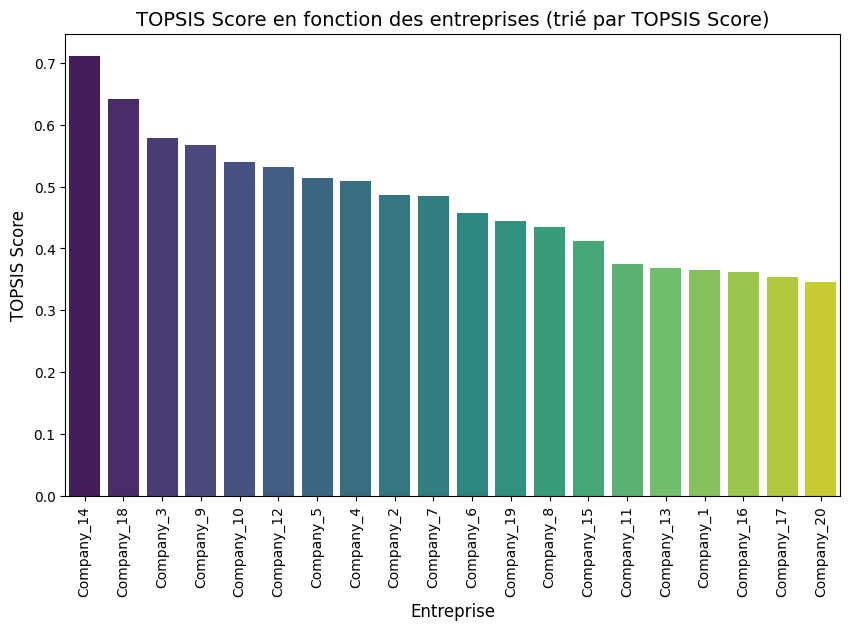

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Trier les données par TOPSIS_Score de manière décroissante
df_esg_sorted_topsis = df_esg.sort_values(by='TOPSIS_Score', ascending=False)

# Créer un graphique en barres trié
plt.figure(figsize=(10, 6))
sns.barplot(x='Company', y='TOPSIS_Score', data=df_esg_sorted_topsis, palette='viridis')

# Ajouter un titre et des étiquettes
plt.title('TOPSIS Score en fonction des entreprises (trié par TOPSIS Score)', fontsize=14)
plt.xlabel('Entreprise', fontsize=12)
plt.ylabel('TOPSIS Score', fontsize=12)

# Afficher le graphique
plt.xticks(rotation=90)  # Tourner les noms des entreprises si nécessaire
plt.show()


<ipython-input-54-9313ed87c372>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company', y='ESG_Index', data=df_esg_sorted, palette='viridis')


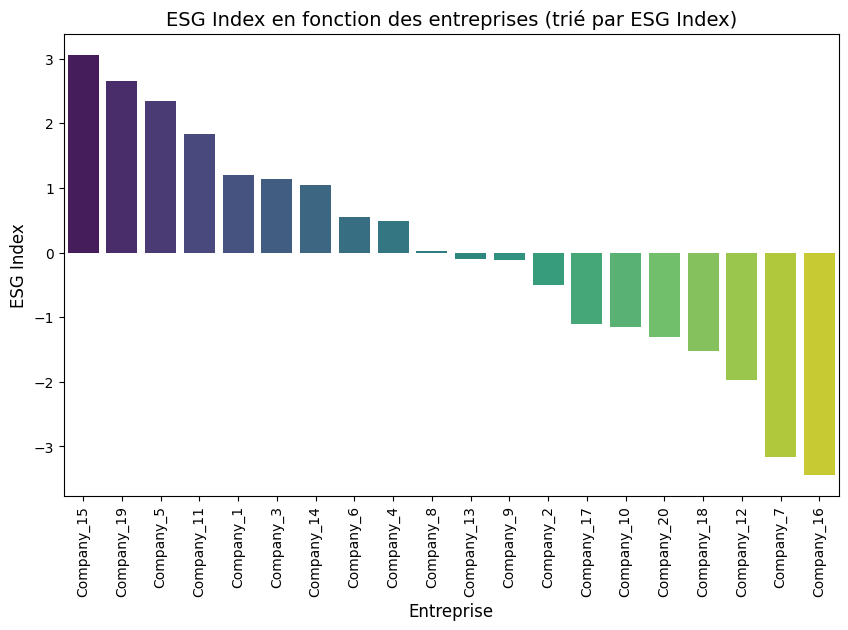

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Trier les données par ESG_Index de manière décroissante
df_esg_sorted = df_esg.sort_values(by='ESG_Index', ascending=False)

# Créer un graphique en barres trié
plt.figure(figsize=(10, 6))
sns.barplot(x='Company', y='ESG_Index', data=df_esg_sorted, palette='viridis')

# Ajouter un titre et des étiquettes
plt.title('ESG Index en fonction des entreprises (trié par ESG Index)', fontsize=14)
plt.xlabel('Entreprise', fontsize=12)
plt.ylabel('ESG Index', fontsize=12)

# Afficher le graphique
plt.xticks(rotation=90)  # Tourner les noms des entreprises si nécessaire
plt.show()

In [ ]:
print(df_esg.columns)

Index(['Company', 'Risk_of_dilution', 'Composition_governance_bodies',
       'Functioning_governance_bodies', 'Compensation_officers_directors',
       'Business_ethics', 'CSR_policy', 'Characteristics_social_policy',
       'Working_conditions', 'Skills_development', 'Equal_opportunities',
       'Health_and_safety', 'Environmental_policy', 'Energy_GHG',
       'Water_management', 'Waste_management', 'Biodiversity',
       'Relations_with_suppliers', 'Relations_with_customers_civil_society',
       'Cybersecurity', 'Governance', 'Social', 'Environment',
       'External_Stakeholders', 'ESG', 'ESG_Index', 'Rank'],
      dtype='object')


In [ ]:
import pandas as pd

# Charger le fichier Excel existant
df_esg = pd.read_excel('/Ranked_ESG_scores.xlsx')  # Remplacez par le chemin réel du fichier

# Définir les nouvelles valeurs pour TOPSIS_Score et RankTOPSIS
topsis_scores = [
    0.365182, 0.485855, 0.579311, 0.509402, 0.513308, 0.456717, 0.484998, 0.434745, 0.567976,
    0.540551, 0.374305, 0.531085, 0.368630, 0.711750, 0.412393, 0.362389, 0.353538, 0.642080,
    0.443624, 0.346147
]  # Liste des scores TOPSIS, remplacez par vos valeurs réelles si nécessaire

ranks_topsis = [
    17, 9, 3, 8, 7, 11, 10, 13, 4, 5, 15, 6, 16, 1, 14, 18, 19, 2, 12, 20
]  # Liste des rangs TOPSIS, remplacez par vos valeurs réelles si nécessaire

# Ajouter les colonnes à df_esg
df_esg['TOPSIS_Score'] = topsis_scores
df_esg['RankTOPSIS'] = ranks_topsis

# Sauvegarder le DataFrame mis à jour dans un nouveau fichier Excel
df_esg.to_excel('/content/Ranked_ESG_scores.xlsx', index=False)  # Remplacez par le chemin désiré

print("Les colonnes TOPSIS_Score et RankTOPSIS ont été ajoutées et enregistrées.")


Les colonnes TOPSIS_Score et RankTOPSIS ont été ajoutées et enregistrées.


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Charger le fichier Excel
df_esg = pd.read_excel('/content/ESG_scores.xlsx')

# Sélection des variables pour le calcul de l'indice ESG
variables = [
    'Risk_of_dilution', 'Composition_governance_bodies', 'Functioning_governance_bodies',
    'Compensation_officers_directors', 'Business_ethics', 'CSR_policy',
    'Characteristics_social_policy', 'Working_conditions', 'Skills_development',
    'Equal_opportunities', 'Health_and_safety', 'Environmental_policy',
    'Energy_GHG', 'Water_management', 'Waste_management', 'Biodiversity',
    'Relations_with_suppliers', 'Relations_with_customers_civil_society', 'Cybersecurity'
]

# Vérifier que les variables existent dans les colonnes du DataFrame
missing_cols = [col for col in variables if col not in df_esg.columns]
if missing_cols:
    raise ValueError(f"Les colonnes suivantes sont absentes du fichier : {missing_cols}")

# Normalisation des données
scaler = StandardScaler()
data_normalized = scaler.fit_transform(df_esg[variables])

# Application de l'ACP
pca = PCA(n_components=1)  # Une seule composante pour obtenir l'indice ESG
pca_result = pca.fit_transform(data_normalized)

# Ajouter l'indice ESG à la base de données
df_esg['ESG_Index'] = pca_result

# Calcul des rangs basés sur ESG_Index
df_esg['RankESG'] = df_esg['ESG_Index'].rank(ascending=False, method='min')

# Afficher le DataFrame avec les rangs
print("\nClassement des entreprises basé sur ESG_Index :")
print(df_esg[['Company', 'ESG_Index', 'RankESG']])

# Sauvegarder le DataFrame avec le classement dans un fichier Excel
df_esg.to_excel('/Ranked_ESG_scores.xlsx', index=False)



Classement des entreprises basé sur ESG_Index :
       Company  ESG_Index  RankESG
0    Company_1   1.201915      5.0
1    Company_2  -0.500217     13.0
2    Company_3   1.141719      6.0
3    Company_4   0.491222      9.0
4    Company_5   2.347475      3.0
5    Company_6   0.548181      8.0
6    Company_7  -3.165678     19.0
7    Company_8   0.025225     10.0
8    Company_9  -0.118322     12.0
9   Company_10  -1.151353     15.0
10  Company_11   1.839408      4.0
11  Company_12  -1.967609     18.0
12  Company_13  -0.093188     11.0
13  Company_14   1.047951      7.0
14  Company_15   3.062141      1.0
15  Company_16  -3.436896     20.0
16  Company_17  -1.110571     14.0
17  Company_18  -1.522200     17.0
18  Company_19   2.661208      2.0
19  Company_20  -1.300411     16.0


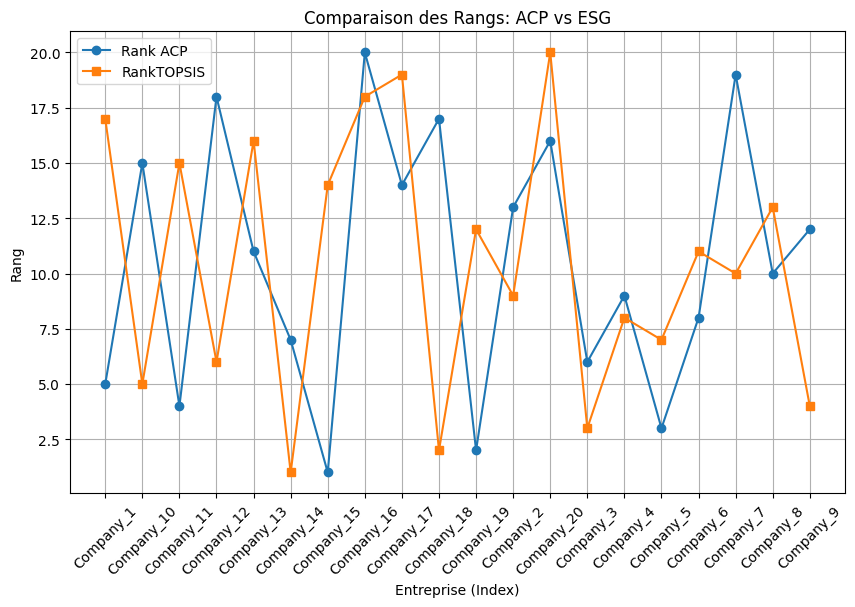

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trier les entreprises par leur nom dans l'ordre croissant
df_esg = df_esg.sort_values(by='Company')

# Graphique des rangs (comparaison visuelle)
plt.figure(figsize=(10, 6))
x = range(len(df_esg))
plt.plot(x, df_esg['RankESG'], label='Rank ACP', marker='o')
plt.plot(x, df_esg['RankTOPSIS'], label='RankTOPSIS', marker='s')
plt.title("Comparaison des Rangs: ACP vs ESG")
plt.xlabel("Entreprise (Index)")
plt.ylabel("Rang")
plt.xticks(x, df_esg['Company'], rotation=45)
plt.legend()
plt.grid()
plt.show()

In [ ]:
import pandas as pd

# Charger le fichier Excel avec les données
df_esg = pd.read_excel('/content/Ranked_ESG_scores.xlsx')  # Adaptez le chemin si nécessaire

# Calcul de la corrélation entre les rangs TOPSIS et ESG
correlation = df_esg['RankTOPSIS'].corr(df_esg['RankESG'])

# Affichage de la corrélation
print(f"Corrélation entre RankTOPSIS et RankESG : {correlation}")


Corrélation entre RankTOPSIS et RankESG : 0.012030075187969924


In [ ]:
import pandas as pd

# Charger le fichier Excel avec les données
df_esg = pd.read_excel('/content/Ranked_ESG_scores.xlsx')  # Adaptez le chemin si nécessaire

# Sélectionner les colonnes 'Company', 'RankTOPSIS' et 'RankESG'
df_display = df_esg[['Company', 'RankTOPSIS', 'RankESG']]

# Afficher le tableau
print("\nTableau des entreprises avec RankTOPSIS et RankESG :")
print(df_display)



Tableau des entreprises avec RankTOPSIS et RankESG :
       Company  RankTOPSIS  RankESG
0    Company_1          17        5
1    Company_2           9       13
2    Company_3           3        6
3    Company_4           8        9
4    Company_5           7        3
5    Company_6          11        8
6    Company_7          10       19
7    Company_8          13       10
8    Company_9           4       12
9   Company_10           5       15
10  Company_11          15        4
11  Company_12           6       18
12  Company_13          16       11
13  Company_14           1        7
14  Company_15          14        1
15  Company_16          18       20
16  Company_17          19       14
17  Company_18           2       17
18  Company_19          12        2
19  Company_20          20       16


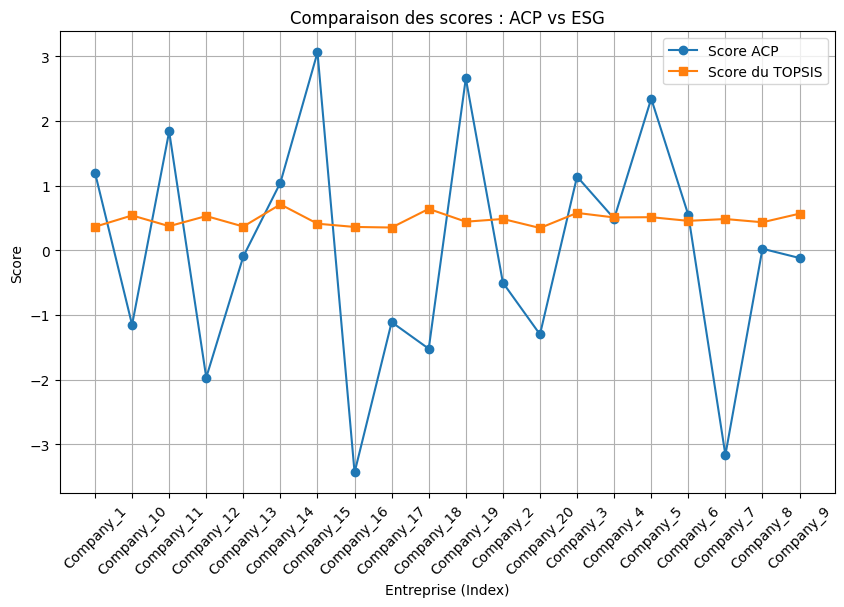

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trier les entreprises par leur nom dans l'ordre croissant
df_esg = df_esg.sort_values(by='Company')

# Graphique des rangs (comparaison visuelle)
plt.figure(figsize=(10, 6))
x = range(len(df_esg))
plt.plot(x, df_esg['ESG_Index'], label='Score ACP', marker='o')
plt.plot(x, df_esg['TOPSIS_Score'], label='Score du TOPSIS', marker='s')
plt.title("Comparaison des scores : ACP vs ESG")
plt.xlabel("Entreprise (Index)")
plt.ylabel("Score")
plt.xticks(x, df_esg['Company'], rotation=45)
plt.legend()
plt.grid()
plt.show()